In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [251]:
#sigmoid function z(x) = 1 / (1 + e^(-x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [252]:
#computing cost on the basis of current theta
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5 #to prevent computation log(0) when h=0
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [253]:
#implementing gradient descent
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) #updating theta parameters
        cost_history[i] = compute_cost(X, y, params) #computing cost

    return (cost_history, params)

In [254]:
#predicts y values corresponding to X and theta
def predict(X, params):
    return np.round(sigmoid(X @ params)) #rounds of the values greater than 0.5 to 1 and less than it to 0

In [255]:
#importing the dataset
data = pd.read_excel("data/diabetes.xlsx")
#printing the first few rows in the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [256]:
#Converting the NAN fields to number
data[:] = np.nan_to_num(data)
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
#Standardizing feature by performing scaling with respec to mean values
x = StandardScaler().fit_transform(x)

In [257]:
#Using PCA the extract principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf, data[['Outcome']]], axis = 1)
finalDf['Constant'] = np.ones(len(finalDf)).reshape(-1,1)
X = finalDf[['Constant','principal component 1','principal component 2']]
X  = X.values.reshape(-1,3)
y = finalDf['Outcome']
y = y.values.reshape(-1,1)

In [258]:
#Plotting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

Predicted:  -1.6648212542467788 1.4984569093975322


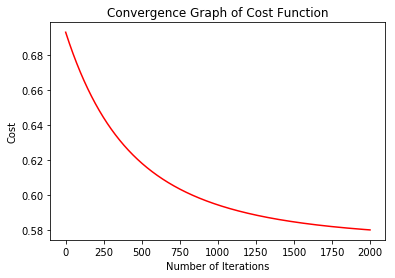

In [259]:
m = len(y_train)
n = np.size(X_train,1)
params = np.zeros((n,1))

iterations = 2000
learning_rate = 0.003

#setting up initial cost
initial_cost = compute_cost(X_train, y_train, params)
#print("Initial Cost is: {} \n".format(initial_cost))
#calling Gradient Descent on training set
(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)
#predicting the y values from the equation of line obtained by gradient descent algorithm
y_pred = predict(X_test, params_optimal)

#calculating slope and intercept
slope = -(params_optimal[1][0]/params_optimal[2][0])
intercept = -(params_optimal[0][0]/params_optimal[2][0])

print("Predicted: ",slope,intercept)

#Plotting the cost curve
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [260]:
#importing Logistic Regression Model to find the best fit line on training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
#logistic = LogisticRegression(fit_intercept=True,intercept_scaling=3,max_iter=1000)

#Fitting the classifier on the training set
logistic.fit(X_train,y_train.ravel())
#Predicting y values on the basis of the above model obtained
y_pred_LR = logistic.predict(X_test)
y_pred_log = y_pred_LR
y_pred_log.reshape(y_pred_log.shape[0],-1)

#finding slope and intercept
slope_ori = -(logistic.coef_[0][1]/logistic.coef_[0][2])
intercept_ori = -(logistic.coef_[0][0]/logistic.coef_[0][2])

print("Actual: ",slope_ori,intercept_ori)

Actual:  -1.6168903686402907 0.9204008644401268


In [261]:
#computing the average score, precision, recall and f-score on the model built from scratch
print("Computed Score:")
avg_score = float(sum(y_pred == y_test))/ float(len(y_test))
print("Average Score: ",avg_score)
true_positive = 0
for i in range(len(y_pred)):
    if y_pred[i][0] == 1 and y_test[i][0] == 1:
        true_positive = true_positive + 1
obs_positive = sum(sum(y_pred))
actual_positive = sum(sum(y_test))

print("Observed Positive: ",obs_positive)
print("Actual Positive: ",actual_positive)
recall = float(true_positive) / float(actual_positive)
print("Recall: ",recall)
precision = float(true_positive) / float(obs_positive)
print("Precision: ",precision)
f1 = (2.0 * precision * recall) / (precision + recall)
print("f-Score: ",f1)

Computed Score:
Average Score:  0.7748917748917749
Observed Positive:  66.0
Actual Positive:  68.0
Recall:  0.6029411764705882
Precision:  0.6212121212121212
f-Score:  0.6119402985074627


In [262]:
#computing the average score, precision, recall and f-score on the existing Logistic Regression model
print("Computed by existing logistic regression model:")
s = 0
for i in range(len(y_pred_log)):
    if y_pred_log[i] == y_test[i][0]:
        s = s + 1
avg_score = float(s)/ float(len(y_test))
print("Average Score: ",avg_score)
true_positive = 0
for i in range(len(y_pred_log)):
    if y_pred_log[i] == 1 and y_test[i][0] == 1:
        true_positive = true_positive + 1
obs_positive = sum(y_pred_log)
actual_positive = sum(sum(y_test))

print("Observed Positive: ",obs_positive)
print("Actual Positive: ",actual_positive)
recall = float(true_positive) / float(actual_positive)
print("Recall: ",recall)
precision = float(true_positive) / float(obs_positive)
print("Precision: ",precision)
f1 = (2.0 * precision * recall) / (precision + recall)
print("f-Score: ",f1)

Computed by existing logistic regression model:
Average Score:  0.7835497835497836
Observed Positive:  54.0
Actual Positive:  68.0
Recall:  0.5294117647058824
Precision:  0.6666666666666666
f-Score:  0.5901639344262295
